<a href="https://colab.research.google.com/github/mayraberrones94/FCFM/blob/master/Semana_1_Pre_procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2: Procesamiento de Datos
- Fernando Barajas Ramírez
- Matrícula: 2085375
- Github: https://github.com/ferbarajas/ProcesamientoFCFM

## 1. Lectura y limpieza de datos

Instrucciones:

Utilicen la extracción de palabras clave, stopwords, lematización, y stemming para hacer n preprocesamiento de la información. Utilizar gráficos adecuados para representar la información, y describir de manera general cual puede ser el propósito de la base de datos. (Conclusiones de lo que se puede hacer con los datos recopilados).

In [49]:
# Librerías para utilizar

import pandas as pd
import numpy as np

# Cargar base de datos
datos_reviews = pd.read_csv("G:/My Drive/MCD/TRABAJO DE CLASE/(T4) Procesamiento de Datos/Tarea 2/Datasets/Amazon Cell Phones Reviews/20191226-reviews.csv")
datos_items = pd.read_csv("G:/My Drive/MCD/TRABAJO DE CLASE/(T4) Procesamiento de Datos/Tarea 2/Datasets/Amazon Cell Phones Reviews/20191226-items.csv")

# Cargar semilla para poder dar reproducibilidad (1)
np.random.seed(0)

Se visualizan ambas partes del dataset:

In [50]:
datos_reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [51]:
datos_items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


Se revisan los valores nulos para ambas tablas:

In [52]:
datos_items.isnull().sum()

asin             0
brand            4
title            0
url              0
image            0
rating           0
reviewUrl        0
totalReviews     0
price            0
originalPrice    0
dtype: int64

In [53]:
datos_reviews.isnull().sum()

asin                0
name                2
rating              0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64

In [54]:
# Verificar cuantas filas y columnas tiene nuestra base de datos.
print("reviews: ", datos_reviews.shape)
print("items: ", datos_items.shape)

reviews:  (67986, 8)
items:  (720, 10)


Se unen ambas tablas de acuerdo al codigo "asin" del producto sobre el que se realiza el review

In [55]:
datos_merge = pd.DataFrame(pd.merge(datos_reviews,datos_items, on='asin'))
datos_merge

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,url,image,rating_y,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00


Se revisan los datos faltantes de la unión generada:

In [56]:
datos_merge.isnull().sum()

asin                 0
name                 2
rating_x             0
date                 0
verified             0
title_x             14
body                21
helpfulVotes     40771
brand              200
title_y              0
url                  0
image                0
rating_y             0
reviewUrl            0
totalReviews         0
price                0
originalPrice        0
dtype: int64

De estas columnas, se eliminan los siguientes atributos que se considera no apotan información en el análisis propuesto:

In [57]:
datos_merge = datos_merge.drop(columns=['asin','originalPrice', 'price','rating_x','rating_y','reviewUrl','totalReviews','title_y','helpfulVotes','date','name','url','image'])
# Cambio de nombre de columnas
datos_merge = datos_merge.rename(columns={"title_x": "title"})
datos_merge

,verified,title,body,brand
0,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,NaN
1,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,NaN
2,False,Love This Phone,"This is a great, reliable phone. I also purcha...",NaN
3,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",NaN
4,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,NaN
...,...,...,...,...
67981,False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,Sony
67982,False,Simply Amazing!,I've been an Xperia user for several years and...,Sony
67983,False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,Sony
67984,True,Phone is like new,Product looks and works like new. Very much re...,Apple


Se busca revisar solamente las opiniones de productos donde se especifica la marca. Como se revisa anteriormente, existen 200 registros que no cuentan con la marca del producto, Igualmente, se evaluan los valores faltantes a continuación:

In [58]:
# Se revisan los valores faltantes:
datos_merge.isnull().sum()

verified      0
title        14
body         21
brand       200
dtype: int64

Se observa que las columnas con valores faltantes son aquellas donde no hay un titulo, comentario (body) o marca del producto. A continuación se eliminan las filas donde existan esos valores faltantes:

In [59]:
datos_merge = datos_merge.dropna()

# Validar que existan 0 valores faltantes:
datos_merge.isnull().sum()

verified    0
title       0
body        0
brand       0
dtype: int64

In [60]:
# Se revisa el nuevo tamaño de la base de datos:
datos_merge.shape

(67756, 4)

Para dar más veracidad a los comentarios, se filtran por los reviews de usuarios cuyas compras estan "verificadas", lo que significa que la opinión proviene de un usuario que se ha validado, compró el producto.

In [61]:
datos_merge = datos_merge[datos_merge['verified'] == True]
# Se revisa el tamaño de la nueva base de datos
datos_merge.shape

(61051, 4)

## 2. Exploración de datos

In [62]:
# Cantidad de opiniones verificadas por marca de teléfono
pd.crosstab(index = datos_merge["brand"], columns="verified")

col_0,verified
brand,
ASUS,206
Apple,4875
Google,3162
HUAWEI,2019
Motorola,7713
Nokia,4877
OnePlus,304
Samsung,30997
Sony,2691


array([<AxesSubplot:ylabel='verified'>], dtype=object)

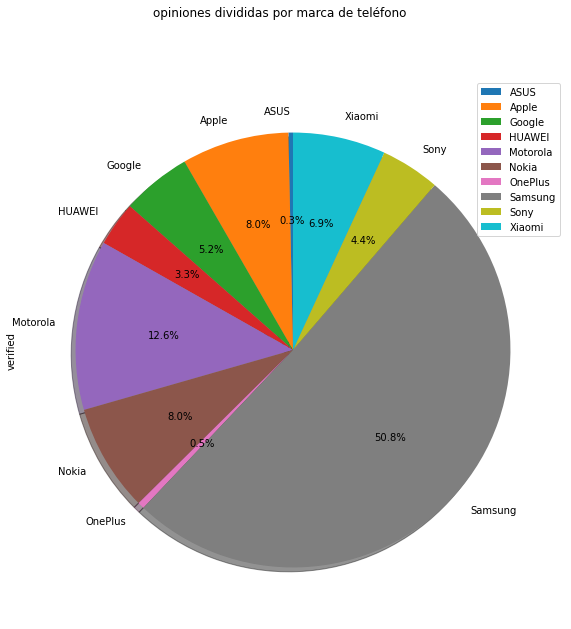

In [63]:
datos_merge.groupby(['brand']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%',title='opiniones divididas por marca de teléfono')

## 3. Pre-procesamiento de datos

In [64]:
# Se cargan las librerias necesarias
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shney\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Se realiza el pre-procesamiento necesario para los comentarios y reviews realizados por los usuarios:

In [65]:
import re
# Remover hipervinculos (URLs)
datos_merge["body"] = datos_merge.apply(lambda row: re.sub(r"https?://\S+", "", row["body"]), axis=1)

# Convertir todas las palabras a minusculas
datos_merge["body"] = datos_merge.apply(lambda row: row["body"].lower(), axis=1)

# Se remueven los numeros tambien
datos_merge["body"] = datos_merge.apply(lambda row: re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", row["body"]), axis=1)

# Remover caracteres espciales y nunmeros
datos_merge["body"] = datos_merge.apply(lambda row: re.sub('[^a-zA-Z0-9 ]', "", row["body"]), axis=1)
datos_merge["body"]

14                                 dont buy out of service
17        star because the phones locked so i have to p...
18       the product has been very good i had used this...
21       i bought this phone to replace an lg phone tha...
22       i purchased this phone for my att phone replac...
                               ...                        
67974    for this price you get a good display and a ma...
67975    love this phone been using it for a month now ...
67976                          best phone from sony so far
67977    i love it for what i use it for the battery la...
67984    product looks and works like new very much rec...
Name: body, Length: 61051, dtype: object

Se realiza el pre-procesamiento necesario para los títulos de las opiniones realizados por los usuarios:

In [66]:
# Remover hipervinculos (URLs)
datos_merge["title"] = datos_merge.apply(lambda row: re.sub(r"https?://\S+", "", row["title"]), axis=1)

# Convertir todas las palabras a minusculas
datos_merge["title"] = datos_merge.apply(lambda row: row["title"].lower(), axis=1)

# Se remueven los numeros tambien
datos_merge["title"] = datos_merge.apply(lambda row: re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", row["title"]), axis=1)

# Remover caracteres espciales y nunmeros
datos_merge["title"] = datos_merge.apply(lambda row: re.sub('[^a-zA-Z0-9 ]', "", row["title"]), axis=1)
datos_merge["title"]

14                                            stupid phone
17                                           phones locked
18                                       excellent product
21                                                nice but
22       it seems it doesnt work with the existing att ...
                               ...                        
67974                                     im not impressed
67975                                          great phone
67976                                              love it
67977                                        that it works
67984                                    phone is like new
Name: title, Length: 61051, dtype: object

Se genera la tokenización de cada comentario y titulo como se muestra a continuación:

In [67]:
bodytokens = datos_merge.apply(lambda row: nltk.word_tokenize(row['body']), axis=1)
titletokens = datos_merge.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

datos_merge.insert(2, "titletokens", titletokens, True)
datos_merge.insert(4, "bodytokens", bodytokens, True)

In [68]:
# Descargar stopwords
nltk.download('stopwords')
# importar sotpwords
sw = nltk.corpus.stopwords.words('english')

def rmsw(datos):
    return [word for word in datos if word not in sw]

# En caso de agregar palabras adicionales a las stopwords usar:
newStopWords = ['sony','lg','apple','samsung','asus','huawei','motorola','moto','nokia','xiaomi','att','at&t','phone','stars','five','also','iphone','pixel']
sw.extend(newStopWords) # print(sw[:100])

datos_merge['titletokens'] = datos_merge['titletokens'].apply(rmsw)
datos_merge['bodytokens'] = datos_merge['bodytokens'].apply(rmsw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shney\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Lematización de palabras
from nltk.stem import PorterStemmer

lemmatizer = PorterStemmer()

# # Descargar wordnet como diccionario para la lematización
# nltk.download('wordnet')
# nltk.download('omw-1.4')

def lematizar(datos):
    return [lemmatizer.stem(word) for word in datos]

datos_merge['titletokens'] = datos_merge['titletokens'].apply(lematizar)
datos_merge['bodytokens'] = datos_merge['bodytokens'].apply(lematizar)

datos_merge

,verified,title,titletokens,body,bodytokens,brand
14,True,stupid phone,[stupid],dont buy out of service,"[dont, buy, servic]",Motorola
17,True,phones locked,"[phone, lock]",star because the phones locked so i have to p...,"[star, phone, lock, pay, addit, fee, unlock]",Motorola
18,True,excellent product,"[excel, product]",the product has been very good i had used this...,"[product, good, use, cell, one, project, work,...",Motorola
21,True,nice but,[nice],i bought this phone to replace an lg phone tha...,"[bought, replac, didnt, like, expect, put, old...",Motorola
22,True,it seems it doesnt work with the existing att ...,"[seem, doesnt, work, exist, sim, card]",i purchased this phone for my att phone replac...,"[purchas, replac, even, though, one, faq, ment...",Motorola
...,...,...,...,...,...,...
67974,True,im not impressed,"[im, impress]",for this price you get a good display and a ma...,"[price, get, good, display, magnific, backfac,...",Sony
67975,True,great phone,[great],love this phone been using it for a month now ...,"[love, use, month, black, one, display, graphi...",Sony
67976,True,love it,[love],best phone from sony so far,"[best, far]",Sony
67977,True,that it works,[work],i love it for what i use it for the battery la...,"[love, use, batteri, last, day, light, use]",Sony


In [70]:
import itertools
titulos = list(itertools.chain.from_iterable(datos_merge['titletokens']))
comentarios = list(itertools.chain.from_iterable(datos_merge['bodytokens']))
print('Titulos: ',titulos[:10])
print('Comentarios: ',comentarios[:10])

Titulos:  ['stupid', 'phone', 'lock', 'excel', 'product', 'nice', 'seem', 'doesnt', 'work', 'exist']
Comentarios:  ['dont', 'buy', 'servic', 'star', 'phone', 'lock', 'pay', 'addit', 'fee', 'unlock']


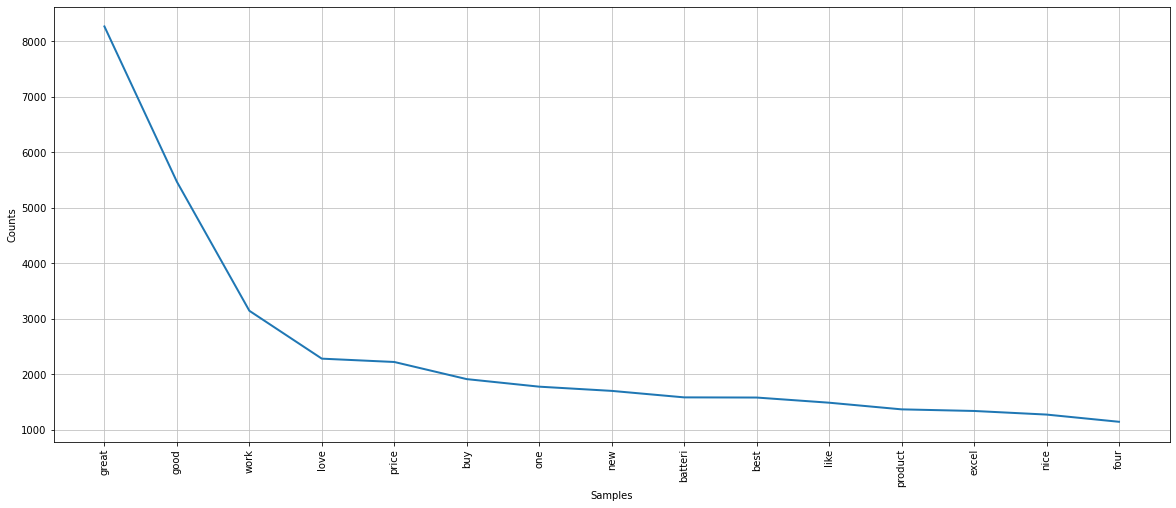

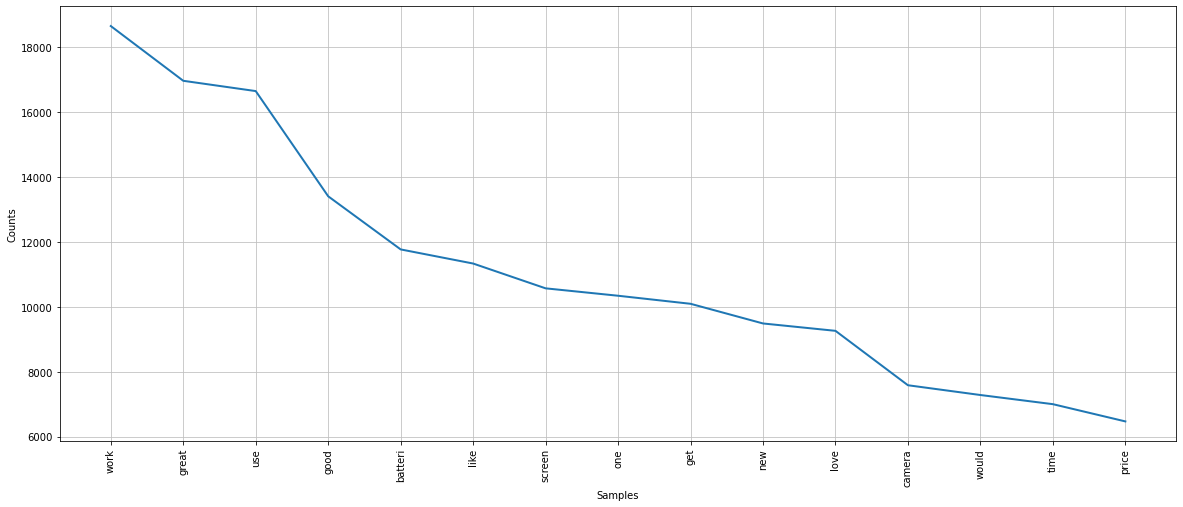

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [71]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Creating the word frequency distribution
freqtitulos = nltk.FreqDist(titulos)
freqcomentarios = nltk.FreqDist(comentarios)

# Plotting the word frequency distribution
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
freqtitulos.plot(15)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
freqcomentarios.plot(15)

(-0.5, 799.5, 399.5, -0.5)

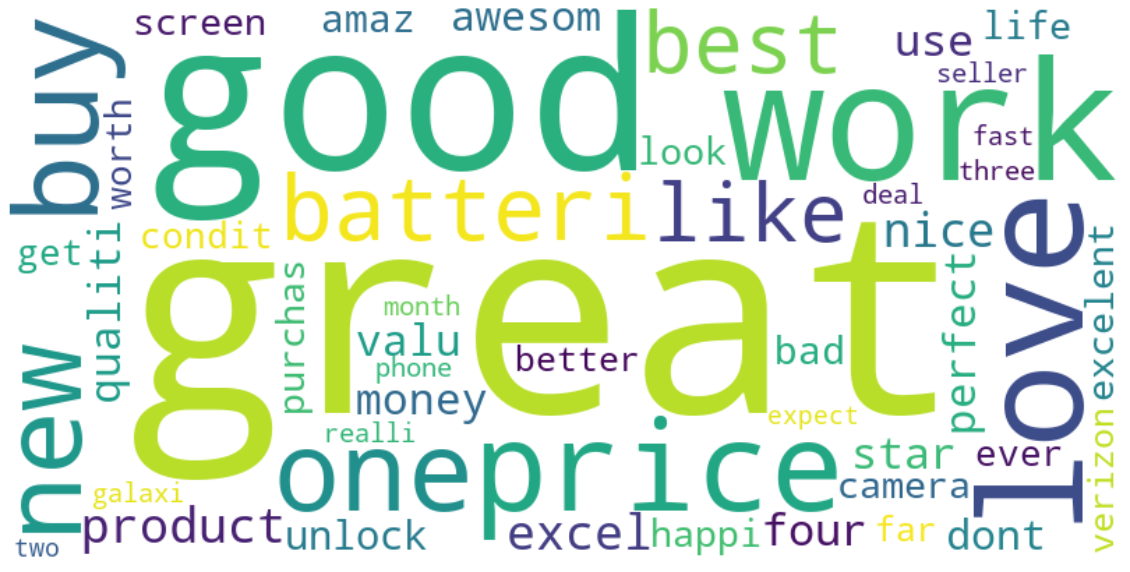

In [72]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

plt.figure(figsize=(20,15))
map_cloud = WordCloud(width=800, height=400, background_color='white',max_words=50).generate_from_frequencies(freqtitulos)
plt.imshow(map_cloud, interpolation='bilinear')
map_cloud.to_file('freq_titulos' + '.png')
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

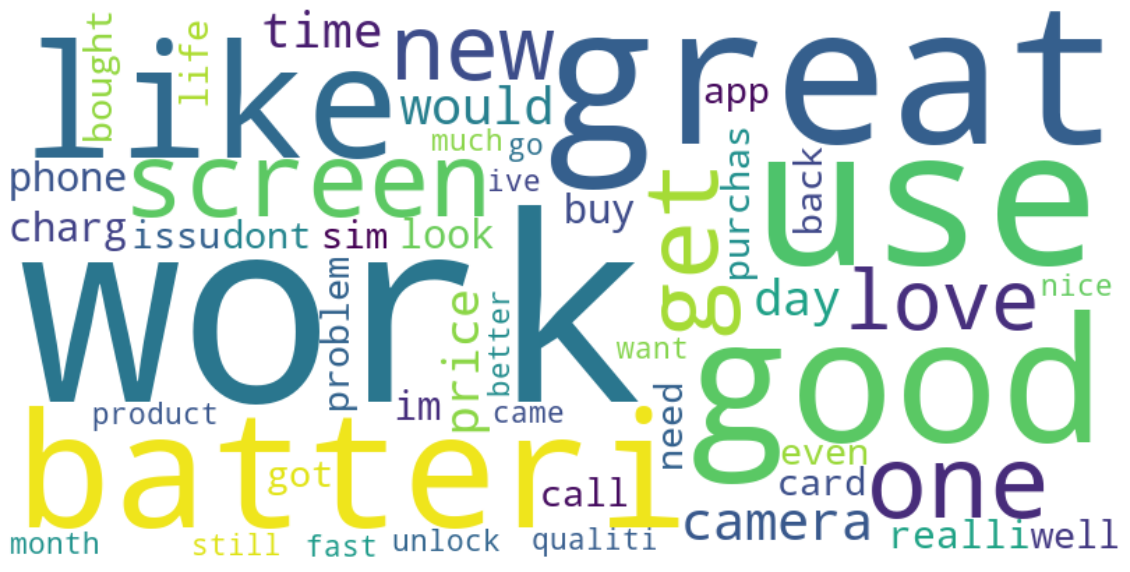

In [73]:
plt.figure(figsize=(20,15))
map_cloud = WordCloud(width=800, height=400, background_color='white',max_words=50).generate_from_frequencies(freqcomentarios)
plt.imshow(map_cloud, interpolation='bilinear')
map_cloud.to_file('freq_comentarios' + '.png')
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

In [74]:
# Unnest de la columna titletokens
# ==============================================================================
title_tidy = datos_merge.explode(column='titletokens')
title_tidy = title_tidy.drop(columns=['title','verified','body','bodytokens'])
title_tidy = title_tidy.rename(columns={'titletokens':'token'})
print('Titulos: ','\n',title_tidy.head(3))

# Unnest de la columna bodytokens
# ==============================================================================
comment_tidy = datos_merge.explode(column='bodytokens')
comment_tidy = comment_tidy.drop(columns=['body','verified','title','titletokens'])
comment_tidy = comment_tidy.rename(columns={'bodytokens':'token'})
print('\n','Comentarios: ','\n',comment_tidy.head(3))

Titulos:  
      token     brand
14  stupid  Motorola
17   phone  Motorola
17    lock  Motorola

 Comentarios:  
      token     brand
14    dont  Motorola
14     buy  Motorola
14  servic  Motorola


In [75]:
title_tidy.groupby(['brand','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('brand') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

brand     token  count
brand                                    
ASUS     120        ASUS     great     37
         118        ASUS      good     19
         207        ASUS     price     12
         290        ASUS      work      9
         88         ASUS     excel      8
Apple    956       Apple     great    595
         942       Apple      good    509
         1876      Apple      work    326
         1258      Apple       new    302
         541       Apple       buy    247
Google   2484     Google     great    554
         2471     Google      good    322
         3347     Google      work    177
         2739     Google       new    163
         2047     Google   batteri    122
HUAWEI   3920     HUAWEI     great    264
         3911     HUAWEI      good    187
         3512     HUAWEI      best    140
         4274     HUAWEI     price    125
         4064     HUAWEI      love     81
Motorola 5646   Motorola     great   1199
         5626   Motorola      good    732
         7092   Motorola      work    383
         6352   Motorola     price    382
         4923   Motorola   batteri    303
Nokia    7907      Nokia     great    525
         7893      Nokia      good    401
         8337      Nokia       one    228
         9049      Nokia      work    219
         8148      Nokia      love    177
OnePlus  9219    OnePlus     great     60
         9217    OnePlus      good     30
         9120    OnePlus      best     24
         9404    OnePlus      valu     21
         9317    OnePlus     price     15
Samsung  11389   Samsung     great   4122
         11343   Samsung      good   2571
         14219   Samsung      work   1712
         11933   Samsung      love   1246
         12233   Samsung       new   1012
Sony     14910      Sony     great    356
         14899      Sony      good    218
         15104      Sony      love    129
         14469      Sony      best     92
         15816      Sony      work     91
Xiaomi   16636    Xiaomi     great    557
         16620    Xiaomi      good    480
         17123    Xiaomi     price    341
         16467    Xiaomi  excelent    251
         16064    Xiaomi      best    243

In [76]:
comment_tidy.groupby(['brand','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('brand') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

brand    token  count
brand                                   
ASUS     1607       ASUS      use     96
         683        ASUS    great     94
         660        ASUS      get     72
         288        ASUS   camera     64
         1316       ASUS   screen     64
Apple    6508      Apple     work   1642
         4571      Apple      new   1195
         2332      Apple  batteri   1153
         3683      Apple    great    900
         4205      Apple     like    846
Google   11974    Google     work   1135
         8781     Google    great   1052
         11737    Google      use    993
         7286     Google  batteri    893
         8742     Google    googl    858
HUAWEI   14347    HUAWEI    great    640
         17144    HUAWEI      use    628
         14309    HUAWEI     good    545
         13048    HUAWEI   camera    528
         17368    HUAWEI     work    490
Motorola 21335  Motorola    great   2494
         26345  Motorola      use   2485
         26760  Motorola     work   2439
         18758  Motorola  batteri   2232
         21255  Motorola     good   2076
Nokia    34826     Nokia      use   1980
         35203     Nokia     work   1630
         30330     Nokia     good   1430
         30400     Nokia    great   1407
         31257     Nokia     like   1239
OnePlus  36181   OnePlus    great    108
         37282   OnePlus      use    103
         37372   OnePlus     work    102
         36382   OnePlus     like     78
         36597   OnePlus   oneplu     75
Samsung  54624   Samsung     work   9355
         44658   Samsung    great   8029
         53808   Samsung      use   7434
         44529   Samsung     good   5628
         47659   Samsung      new   5324
Sony     61011      Sony      use   1129
         56131      Sony   camera   1041
         57619      Sony    great   1032
         59913      Sony   screen    985
         57575      Sony     good    861
Xiaomi   64520    Xiaomi    great   1202
         64462    Xiaomi     good   1196
         68266    Xiaomi      use   1129
         68559    Xiaomi     work   1041
         62707    Xiaomi   camera    967

## 4. Análisis de sentimientos

Analisis de sentimiento usando TextBlob

In [77]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

Analisis de polaridad sobre los titulos de las opiniones

In [94]:
datos_merge['title_polarity'] = datos_merge['title'].apply(getPolarity)
datos_merge['title_analysis'] = datos_merge['title_polarity'].apply(analysis)
datos_merge.head(3)

,verified,title,titletokens,body,bodytokens,brand,title_polarity,title_analysis,body_polarity,body_analysis
14,True,stupid phone,[stupid],dont buy out of service,"[dont, buy, servic]",Motorola,-0.8,Negative,-0.8,Negative
17,True,phones locked,"[phone, lock]",star because the phones locked so i have to p...,"[star, phone, lock, pay, addit, fee, unlock]",Motorola,0.0,Neutral,0.0,Neutral
18,True,excellent product,"[excel, product]",the product has been very good i had used this...,"[product, good, use, cell, one, project, work,...",Motorola,1.0,Positive,1.0,Positive
21,True,nice but,[nice],i bought this phone to replace an lg phone tha...,"[bought, replac, didnt, like, expect, put, old...",Motorola,0.6,Positive,0.6,Positive
22,True,it seems it doesnt work with the existing att ...,"[seem, doesnt, work, exist, sim, card]",i purchased this phone for my att phone replac...,"[purchas, replac, even, though, one, faq, ment...",Motorola,0.0,Neutral,0.0,Neutral


In [95]:
datos_merge['body_polarity'] = datos_merge['body'].apply(getPolarity)
datos_merge['body_analysis'] = datos_merge['body_polarity'].apply(analysis)
datos_merge.head(3)

,verified,title,titletokens,body,bodytokens,brand,title_polarity,title_analysis,body_polarity,body_analysis
14,True,stupid phone,[stupid],dont buy out of service,"[dont, buy, servic]",Motorola,-0.8,Negative,0.000000,Neutral
17,True,phones locked,"[phone, lock]",star because the phones locked so i have to p...,"[star, phone, lock, pay, addit, fee, unlock]",Motorola,0.0,Neutral,0.000000,Neutral
18,True,excellent product,"[excel, product]",the product has been very good i had used this...,"[product, good, use, cell, one, project, work,...",Motorola,1.0,Positive,0.386667,Positive
21,True,nice but,[nice],i bought this phone to replace an lg phone tha...,"[bought, replac, didnt, like, expect, put, old...",Motorola,0.6,Positive,0.238432,Positive
22,True,it seems it doesnt work with the existing att ...,"[seem, doesnt, work, exist, sim, card]",i purchased this phone for my att phone replac...,"[purchas, replac, even, though, one, faq, ment...",Motorola,0.0,Neutral,-0.075000,Negative


In [97]:
title_counts = datos_merge.title_analysis.value_counts()
print('Title counts:', '\n', title_counts)
body_counts = datos_merge.body_analysis.value_counts()
print('\n','Body counts:', '\n', body_counts)


Title counts: 
 Positive    28693
Neutral     26970
Negative     5388
Name: title_analysis, dtype: int64

 Body counts: 
 Positive    43919
Neutral      9751
Negative     7381
Name: body_analysis, dtype: int64


([<matplotlib.patches.Wedge at 0x264e83d9cc8>,
 [Text(-0.699519963056262, 0.8489239196098588, 'Positive'),
  Text(0.33492992737429766, -1.04776998608905, 'Neutral'),
  Text(1.2537898455098118, -0.5005107624182347, 'Negative')],
 [Text(-0.38155634348523376, 0.4630494106962866, '71.9%'),
  Text(0.18268905129507143, -0.5715109015031181, '16.0%'),
  Text(0.7894232360617333, -0.3151364059670366, '12.1%')])

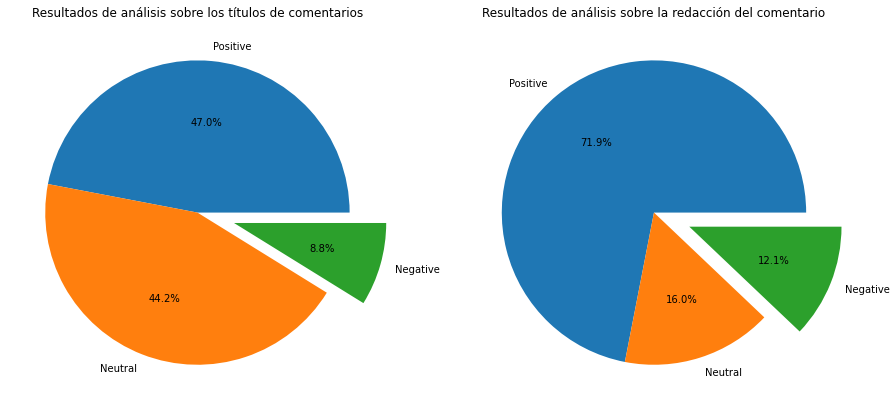

In [103]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Resultados de análisis sobre los títulos de comentarios")
plt.pie(title_counts.values, labels = title_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,2)
plt.title("Resultados de análisis sobre la redacción del comentario")
plt.pie(body_counts.values, labels = body_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [125]:
body_analysis = datos_merge[['brand', 'body_analysis']]
title_analysis = datos_merge[['brand', 'title_analysis']]

<AxesSubplot:xlabel='brand'>

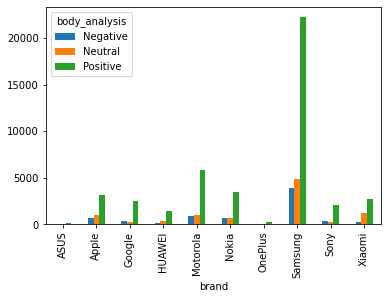

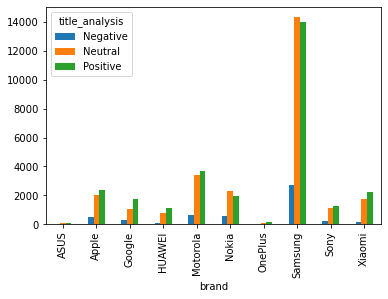

In [126]:
brand_sentiment_body = body_analysis.groupby(['brand', 'body_analysis']).body_analysis.count().unstack()
brand_sentiment_body.plot(kind='bar')

brand_sentiment_title = title_analysis.groupby(['brand', 'title_analysis']).title_analysis.count().unstack()
brand_sentiment_title.plot(kind='bar')